In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Import drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [5]:
# Dataframes

In [6]:
# Μετρήσεις που πραγματοποίησε και δημοσιοποίησε η Διεύθυνση Υδάτων της Αποκεντρωμένης Διοίκησης Αττικής (2019)

In [7]:
# Create dataframe (μετρήσεις Μαΐου 2019)
maios_df1 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2019/perifereia_attikis_maios_2019.xlsx', sheet_name='Φύλλο1')
maios_df1.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2018-05-19 00:00:00,11:05:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ, ΔΥΣΚΟΛΗ ΠΡΟΣΒΑΣΗ ΣΤΗΝ ΠΑΡΑΛΙΑ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2018-05-19 00:00:00,12:40:00,2018-05-20 00:00:00,2018-05-20 00:00:00,1,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ, ΑΧΙΝΟΙ",NaN


In [8]:
# Rename headers
maios_df1.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
maios_df1.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2018-05-19 00:00:00,11:05:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ, ΔΥΣΚΟΛΗ ΠΡΟΣΒΑΣΗ ΣΤΗΝ ΠΑΡΑΛΙΑ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2018-05-19 00:00:00,12:40:00,2018-05-20 00:00:00,2018-05-20 00:00:00,1,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ, ΑΧΙΝΟΙ",NaN


In [9]:
# Remove first three rows
maios_df1 = maios_df1.iloc[3:]
maios_df1.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2018-05-19 00:00:00,11:05:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ, ΔΥΣΚΟΛΗ ΠΡΟΣΒΑΣΗ ΣΤΗΝ ΠΑΡΑΛΙΑ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2018-05-19 00:00:00,12:40:00,2018-05-20 00:00:00,2018-05-20 00:00:00,1,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ, ΑΧΙΝΟΙ",NaN
5,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Δραγονέρα_Αγκιστρίου,GRBW069207012101,Μέσον ακτής,2018-05-19 00:00:00,13:30:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ",NaN
6,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2018-05-19 00:00:00,14:25:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ελαφρά Κυματώδης,ΝΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΘΟΛΑ ( ΛΟΓΩ ΚΥΜΑΤΙΣΜΟΥ), ΠΑΡΟ...",NaN
7,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Σκάλα_Αγκιστρίου,GRBW069207011101,Νοτιοανατολικό άκρο ακτής,2018-05-19 00:00:00,15:00:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΝΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ , ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [10]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
maios_df1['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΜΑΪΟΣ'
maios_df1.head()

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2018-05-19 00:00:00,11:05:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ, ΔΥΣΚΟΛΗ ΠΡΟΣΒΑΣΗ ΣΤΗΝ ΠΑΡΑΛΙΑ",NaN,ΜΑΪΟΣ
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2018-05-19 00:00:00,12:40:00,2018-05-20 00:00:00,2018-05-20 00:00:00,1,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ, ΑΧΙΝΟΙ",NaN,ΜΑΪΟΣ
5,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Δραγονέρα_Αγκιστρίου,GRBW069207012101,Μέσον ακτής,2018-05-19 00:00:00,13:30:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ",NaN,ΜΑΪΟΣ
6,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2018-05-19 00:00:00,14:25:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ελαφρά Κυματώδης,ΝΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΘΟΛΑ ( ΛΟΓΩ ΚΥΜΑΤΙΣΜΟΥ), ΠΑΡΟ...",NaN,ΜΑΪΟΣ
7,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Σκάλα_Αγκιστρίου,GRBW069207011101,Νοτιοανατολικό άκρο ακτής,2018-05-19 00:00:00,15:00:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΝΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ , ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN,ΜΑΪΟΣ


In [11]:
# Delete odd column (Unnamed: 22)
del maios_df1['Unnamed: 22']

In [12]:
# Check dataframe
maios_df1.head(3) # Successful proccess (odd column = deleted)

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2018-05-19 00:00:00,11:05:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ, ΔΥΣΚΟΛΗ ΠΡΟΣΒΑΣΗ ΣΤΗΝ ΠΑΡΑΛΙΑ",ΜΑΪΟΣ
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2018-05-19 00:00:00,12:40:00,2018-05-20 00:00:00,2018-05-20 00:00:00,1,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ, ΑΧΙΝΟΙ",ΜΑΪΟΣ
5,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Δραγονέρα_Αγκιστρίου,GRBW069207012101,Μέσον ακτής,2018-05-19 00:00:00,13:30:00,2018-05-20 00:00:00,2018-05-20 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΣΥΝΝΕΦΙΑ, ΔΙΑΥΓΗ",ΜΑΪΟΣ


In [13]:
# Check missing values
maios_df1.isnull().sum() 

Περιφέρεια                                                9828
Περιφερειακή Ενότητα                                      9828
Δήμος                                                     9828
Ακτή                                                      9828
Κωδικός Σταθμού (BWID)                                    9828
Περιγραφή ελληνικά                                        9828
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9828
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9828
Ημ/νία παράδοσης στο εργ/ριο                              9828
Ημ/νία ανάλυσης                                           9828
Intestinal enterococci (cfu/100ml)                        9828
Escherichia coli (cfu/100ml)                              9828
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9828
ΓΥΑΛΙΑ                                                    9828
ΠΛΑΣΤΙΚΑ                                                  9828
ΚΑΟΥΤΣΟΥΚ                                              

In [14]:
# Remove missing values and create new dataframe
new_maios_df1 = maios_df1.dropna()
# Count rows & columns (check result)
new_maios_df1.shape 

(168, 23)

In [15]:
# Create dataframe (προσθήκη σε μετρήσεις Μαΐου 2019)
maios_df2 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2019/akti_marikes_maios_2019-1.xlsx', sheet_name='Φύλλο1')
maios_df2.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Περιφέρεια Αττικής,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Ραφήνας - Πικερμίου,Μάρκες,NaN,Πλησίον νοτίου άκρου,2019-05-27 00:00:00,14:33:00,2019-05-27 00:00:00,2019-05-28 00:00:00,0,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΕΛΑΦΡΑ ΚΥΜΜΑΤΩΔΗΣ,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [16]:
# Remove first three rows
maios_df2 = maios_df2.iloc[3:]
maios_df2.head() # Check dataframe -> successful process

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
3,Περιφέρεια Αττικής,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Ραφήνας - Πικερμίου,Μάρκες,NaN,Πλησίον νοτίου άκρου,2019-05-27 00:00:00,14:33:00,2019-05-27 00:00:00,2019-05-28 00:00:00,0,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΕΛΑΦΡΑ ΚΥΜΜΑΤΩΔΗΣ,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [17]:
# Rename headers
maios_df2.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
maios_df2.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Περιφέρεια Αττικής,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Ραφήνας - Πικερμίου,Μάρκες,NaN,Πλησίον νοτίου άκρου,2019-05-27 00:00:00,14:33:00,2019-05-27 00:00:00,2019-05-28 00:00:00,0,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΕΛΑΦΡΑ ΚΥΜΜΑΤΩΔΗΣ,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [18]:
# Delete odd column (Unnamed: 22)
del maios_df2['Unnamed: 22']

In [19]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
maios_df2['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΜΑΪΟΣ'
maios_df2

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Περιφέρεια Αττικής,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Ραφήνας - Πικερμίου,Μάρκες,NaN,Πλησίον νοτίου άκρου,2019-05-27 00:00:00,14:33:00,2019-05-27 00:00:00,2019-05-28 00:00:00,0,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΕΛΑΦΡΑ ΚΥΜΜΑΤΩΔΗΣ,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΜΑΪΟΣ


In [20]:
# Rename NaN value according to the official attribute information
maios_df2['Κωδικός Σταθμού (BWID)'].fillna(value='GRBW069224142101', inplace = True)
maios_df2 # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Περιφέρεια Αττικής,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Ραφήνας - Πικερμίου,Μάρκες,GRBW069224142101,Πλησίον νοτίου άκρου,2019-05-27 00:00:00,14:33:00,2019-05-27 00:00:00,2019-05-28 00:00:00,0,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΕΛΑΦΡΑ ΚΥΜΜΑΤΩΔΗΣ,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΜΑΪΟΣ


In [21]:
# Concatenate dataframes
# Count rows & columns (check result)
final_maios_df = pd.concat([new_maios_df1, maios_df2], axis=0)
final_maios_df.shape #one row added (check maios_df1 above)

(169, 23)

In [22]:
# Create dataframe (μετρήσεις Ιουνίου 2019)
iounios_df1 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2019/perifereia_attikis_iounios_2019.xlsx', sheet_name='Φύλλο1')
iounios_df1.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-06-16 00:00:00,11:23:00,2019-06-17 00:00:00,2019-06-17 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2019-06-16 00:00:00,11:57:00,2019-06-17 00:00:00,2019-06-17 00:00:00,3,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN


In [23]:
# Rename headers
iounios_df1.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
iounios_df1.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-06-16 00:00:00,11:23:00,2019-06-17 00:00:00,2019-06-17 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2019-06-16 00:00:00,11:57:00,2019-06-17 00:00:00,2019-06-17 00:00:00,3,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN


In [24]:
# Remove first three rows
iounios_df1 = iounios_df1.iloc[3:]
iounios_df1.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-06-16 00:00:00,11:23:00,2019-06-17 00:00:00,2019-06-17 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2019-06-16 00:00:00,11:57:00,2019-06-17 00:00:00,2019-06-17 00:00:00,3,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
5,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Δραγονέρα_Αγκιστρίου,GRBW069207012101,Μέσον ακτής,2019-06-16 00:00:00,12:13:00,2019-06-17 00:00:00,2019-06-17 00:00:00,0,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
6,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-06-16 00:00:00,12:26:00,2019-06-17 00:00:00,2019-06-17 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
7,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Σκάλα_Αγκιστρίου,GRBW069207011101,Νοτιοανατολικό άκρο ακτής,2019-06-16 00:00:00,12:52:00,2019-06-17 00:00:00,2019-06-17 00:00:00,5,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN


In [25]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
iounios_df1['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΙΟΥΝΙΟΣ'

In [26]:
# Delete odd column (Unnamed: 22)
del iounios_df1['Unnamed: 22']

In [27]:
# Check missing values
iounios_df1.isnull().sum() 

Περιφέρεια                                                9828
Περιφερειακή Ενότητα                                      9828
Δήμος                                                     9828
Ακτή                                                      9828
Κωδικός Σταθμού (BWID)                                    9828
Περιγραφή ελληνικά                                        9828
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9828
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9828
Ημ/νία παράδοσης στο εργ/ριο                              9828
Ημ/νία ανάλυσης                                           9828
Intestinal enterococci (cfu/100ml)                        9828
Escherichia coli (cfu/100ml)                              9828
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9828
ΓΥΑΛΙΑ                                                    9828
ΠΛΑΣΤΙΚΑ                                                  9828
ΚΑΟΥΤΣΟΥΚ                                              

In [28]:
# Remove missing values and create new dataframe
new_iounios_df1 = iounios_df1.dropna()
# Count rows & columns (check result)
new_iounios_df1.shape 

(168, 23)

In [29]:
# Create dataframe (προσθήκη σε μετρήσεις Ιουνίου 2019)
iounios_df2 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2019/akti_marikes_iounios_2019.xlsx', sheet_name='Φύλλο1')
iounios_df2.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Περιφέρεια Αττικής,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Ραφήνας - Πικερμίου,Μαρικές,GRBW069224142101,Πλησίον νοτίου άκρου,2019-06-24 00:00:00,12:29:00,2019-06-24 00:00:00,2019-06-25 00:00:00,7,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [30]:
# Remove first three rows
iounios_df2 = iounios_df2.iloc[3:]
iounios_df2.head() # Check dataframe -> successful process

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
3,Περιφέρεια Αττικής,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Ραφήνας - Πικερμίου,Μαρικές,GRBW069224142101,Πλησίον νοτίου άκρου,2019-06-24 00:00:00,12:29:00,2019-06-24 00:00:00,2019-06-25 00:00:00,7,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [31]:
# Rename headers
iounios_df2.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
iounios_df2.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Περιφέρεια Αττικής,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Ραφήνας - Πικερμίου,Μαρικές,GRBW069224142101,Πλησίον νοτίου άκρου,2019-06-24 00:00:00,12:29:00,2019-06-24 00:00:00,2019-06-25 00:00:00,7,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [32]:
# Delete odd column (Unnamed: 22)
del iounios_df2['Unnamed: 22']

In [33]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
iounios_df2['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΙΟΥΝΙΟΣ'
iounios_df2

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Περιφέρεια Αττικής,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Ραφήνας - Πικερμίου,Μαρικές,GRBW069224142101,Πλησίον νοτίου άκρου,2019-06-24 00:00:00,12:29:00,2019-06-24 00:00:00,2019-06-25 00:00:00,7,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΙΟΥΝΙΟΣ


In [34]:
# Concatenate dataframes
# Count rows & columns (check result)
final_iounios_df = pd.concat([new_iounios_df1, iounios_df2], axis=0)
final_iounios_df.shape #one row added (check iounios_df1 above)

(169, 23)

In [35]:
# Create dataframe (μετρήσεις Ιουλίου 2019)
ioulios_df = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2019/perifereia_attikis_ioulios_2019.xlsx', sheet_name='Φύλλο1')
ioulios_df.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-07-14 00:00:00,13:32:00,2019-07-15 00:00:00,2019-07-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-07-14 00:00:00,14:29:00,2019-07-15 00:00:00,2019-07-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΝΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [36]:
# Rename headers
ioulios_df.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
ioulios_df.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-07-14 00:00:00,13:32:00,2019-07-15 00:00:00,2019-07-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-07-14 00:00:00,14:29:00,2019-07-15 00:00:00,2019-07-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΝΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [37]:
# Remove first three rows
ioulios_df = ioulios_df.iloc[3:]
ioulios_df.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-07-14 00:00:00,13:32:00,2019-07-15 00:00:00,2019-07-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-07-14 00:00:00,14:29:00,2019-07-15 00:00:00,2019-07-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΝΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
5,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2019-07-14 00:00:00,15:04:00,2019-07-15 00:00:00,2019-07-15 00:00:00,10,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
6,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Δραγονέρα_Αγκιστρίου,GRBW069207012101,Μέσον ακτής,2019-07-14 00:00:00,15:19:00,2019-07-15 00:00:00,2019-07-15 00:00:00,1,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΒΔ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
7,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Σκάλα_Αγκιστρίου,GRBW069207011101,Νοτιοανατολικό άκρο ακτής,2019-07-14 00:00:00,16:00:00,2019-07-15 00:00:00,2019-07-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΝΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [38]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
ioulios_df['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΙΟΥΛΙΟΣ'

In [39]:
# Delete odd column (Unnamed: 22)
del ioulios_df['Unnamed: 22']

In [40]:
# Check missing values
ioulios_df.isnull().sum() 

Περιφέρεια                                                9828
Περιφερειακή Ενότητα                                      9828
Δήμος                                                     9828
Ακτή                                                      9828
Κωδικός Σταθμού (BWID)                                    9828
Περιγραφή ελληνικά                                        9828
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9828
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9828
Ημ/νία παράδοσης στο εργ/ριο                              9828
Ημ/νία ανάλυσης                                           9828
Intestinal enterococci (cfu/100ml)                        9828
Escherichia coli (cfu/100ml)                              9828
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9828
ΓΥΑΛΙΑ                                                    9828
ΠΛΑΣΤΙΚΑ                                                  9828
ΚΑΟΥΤΣΟΥΚ                                              

In [41]:
# Remove missing values and create new dataframe
final_ioulios_df = ioulios_df.dropna()
final_ioulios_df.tail() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
167,Αττικής,ΝΗΣΩΝ,Πόρου,Πλαζ_Πλάκας_Πόρου,GRBW039210092101,Μέσον ακτής,2019-07-27 00:00:00,11:39:00,2019-07-27 00:00:00,2019-07-28 00:00:00,1,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΙΟΥΛΙΟΣ
168,Αττικής,ΝΗΣΩΝ,Τροιζηνίας,Ψήφτα_Τροιζηνίας,GRBW039213106101,Δυτικό άκρο ακτής,2019-07-27 00:00:00,12:02:00,2019-07-27 00:00:00,2019-07-28 00:00:00,21,3,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΙΟΥΛΙΟΣ
169,Αττικής,ΝΗΣΩΝ,Τροιζηνίας,Καλλονή_Τροιζηνίας,GRBW039213105101,130 μ. από το νοτιοδυτικό άκρο της ακτής,2019-07-27 00:00:00,12:12:00,2019-07-27 00:00:00,2019-07-28 00:00:00,1,0,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΙΟΥΛΙΟΣ
170,Αττικής,ΔΥΤΙΚΗΣ_ΑΤΤΙΚΗΣ,Μεγαρέων,Κινέτα_Μεγαρέων,GRBW069231071101,Μέσον ακτής,2019-07-27 00:00:00,16:41:00,2019-07-27 00:00:00,2019-07-28 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΙΟΥΛΙΟΣ
171,Αττικής,ΔΥΤΙΚΗΣ_ΑΤΤΙΚΗΣ,Μεγαρέων,Πέραμα_Μεγαρέων,GRBW069231072101,200 μ. από το ανατολικό άκρο της ακτής,2019-07-27 00:00:00,17:06:00,2019-07-27 00:00:00,2019-07-28 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΙΟΥΛΙΟΣ


In [42]:
# Create dataframe (μετρήσεις Αυγούστου 2019)
augoustos_df = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2019/perifereia_attikis_augoustos_2019.xlsx', sheet_name='Φύλλο1')
augoustos_df.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-08-11 00:00:00,11:15:00,2019-08-12 00:00:00,2019-08-12 00:00:00,1,2,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2019-08-11 00:00:00,15:20:00,2019-08-12 00:00:00,2019-08-12 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [43]:
# Rename headers
augoustos_df.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
augoustos_df.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-08-11 00:00:00,11:15:00,2019-08-12 00:00:00,2019-08-12 00:00:00,1,2,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2019-08-11 00:00:00,15:20:00,2019-08-12 00:00:00,2019-08-12 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [44]:
# Remove first three rows
augoustos_df = augoustos_df.iloc[3:]
augoustos_df.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-08-11 00:00:00,11:15:00,2019-08-12 00:00:00,2019-08-12 00:00:00,1,2,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2019-08-11 00:00:00,15:20:00,2019-08-12 00:00:00,2019-08-12 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
5,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Δραγονέρα_Αγκιστρίου,GRBW069207012101,Μέσον ακτής,2019-08-11 00:00:00,15:35:00,2019-08-12 00:00:00,2019-08-12 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
6,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-08-11 00:00:00,15:50:00,2019-08-12 00:00:00,2019-08-12 00:00:00,3,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
7,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Σκάλα_Αγκιστρίου,GRBW069207011101,Νοτιοανατολικό άκρο ακτής,2019-08-11 00:00:00,16:46:00,2019-08-12 00:00:00,2019-08-12 00:00:00,1,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [45]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
augoustos_df['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΑΥΓΟΥΣΤΟΣ'

In [46]:
# Delete odd column (Unnamed: 22)
del augoustos_df['Unnamed: 22']

In [ ]:
# Check missing values
augoustos_df.isnull().sum() 

Περιφέρεια                                                9827
Περιφερειακή Ενότητα                                      9827
Δήμος                                                     9827
Ακτή                                                      9827
Κωδικός Σταθμού (BWID)                                    9827
Περιγραφή ελληνικά                                        9827
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9827
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9827
Ημ/νία παράδοσης στο εργ/ριο                              9827
Ημ/νία ανάλυσης                                           9827
Intestinal enterococci (cfu/100ml)                        9827
Escherichia coli (cfu/100ml)                              9827
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9827
ΓΥΑΛΙΑ                                                    9827
ΠΛΑΣΤΙΚΑ                                                  9827
ΚΑΟΥΤΣΟΥΚ                                              

In [47]:
# Remove missing values and create new dataframe
final_augoustos_df = augoustos_df.dropna()
final_augoustos_df.tail() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
167,Αττικής,ΝΗΣΩΝ,Πόρου,Πλαζ_Πλάκας_Πόρου,GRBW039210092101,Μέσον ακτής,2019-08-23 00:00:00,12:33:00,2019-08-23 00:00:00,2019-08-24 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ",ΑΥΓΟΥΣΤΟΣ
168,Αττικής,ΝΗΣΩΝ,Τροιζηνίας,Ψήφτα_Τροιζηνίας,GRBW039213106101,Δυτικό άκρο ακτής,2019-08-23 00:00:00,12:59:00,2019-08-23 00:00:00,2019-08-24 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΑΥΓΟΥΣΤΟΣ
169,Αττικής,ΝΗΣΩΝ,Τροιζηνίας,Καλλονή_Τροιζηνίας,GRBW039213105101,130 μ. από το νοτιοδυτικό άκρο της ακτής,2019-08-23 00:00:00,13:09:00,2019-08-23 00:00:00,2019-08-24 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΑΥΓΟΥΣΤΟΣ
170,Αττικής,ΔΥΤΙΚΗΣ_ΑΤΤΙΚΗΣ,Μεγαρέων,Κινέτα_Μεγαρέων,GRBW069231071101,Μέσον ακτής,2019-08-23 00:00:00,17:40:00,2019-08-23 00:00:00,2019-08-24 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΑΥΓΟΥΣΤΟΣ
171,Αττικής,ΔΥΤΙΚΗΣ_ΑΤΤΙΚΗΣ,Μεγαρέων,Πέραμα_Μεγαρέων,GRBW069231072101,200 μ. από το ανατολικό άκρο της ακτής,2019-08-23 00:00:00,18:05:00,2019-08-23 00:00:00,2019-08-24 00:00:00,24,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ",ΑΥΓΟΥΣΤΟΣ


In [48]:
# Create dataframe (μετρήσεις Σεπτεμβρίου 2019)
septemvrios_df = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2019/perifereia_attikis_septemvrios_2019.xlsx', sheet_name='Φύλλο1')
septemvrios_df.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-09-08 00:00:00,11:20:00,2019-09-09 00:00:00,2019-09-09 00:00:00,1,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-09-08 00:00:00,11:48:00,2019-09-09 00:00:00,2019-09-09 00:00:00,7,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN


In [49]:
# Rename headers
septemvrios_df.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
septemvrios_df.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-09-08 00:00:00,11:20:00,2019-09-09 00:00:00,2019-09-09 00:00:00,1,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-09-08 00:00:00,11:48:00,2019-09-09 00:00:00,2019-09-09 00:00:00,7,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN


In [50]:
# Remove first three rows
septemvrios_df = septemvrios_df.iloc[3:]
septemvrios_df.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-09-08 00:00:00,11:20:00,2019-09-09 00:00:00,2019-09-09 00:00:00,1,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-09-08 00:00:00,11:48:00,2019-09-09 00:00:00,2019-09-09 00:00:00,7,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
5,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2019-09-08 00:00:00,12:10:00,2019-09-09 00:00:00,2019-09-09 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΑΤΗΡΗΣΕΙΣ: ΕΧΕΙ ΑΛΛΑΞΕΙ ΤΟ Ε...",NaN
6,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Δραγονέρα_Αγκιστρίου,GRBW069207012101,Μέσον ακτής,2019-09-08 00:00:00,12:32:00,2019-09-09 00:00:00,2019-09-09 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
7,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Σκάλα_Αγκιστρίου,GRBW069207011101,Νοτιοανατολικό άκρο ακτής,2019-09-08 00:00:00,12:49:00,2019-09-09 00:00:00,2019-09-09 00:00:00,2,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ (ΦΥΚΙ...",NaN


In [51]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
septemvrios_df['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΣΕΠΤΕΜΒΡΙΟΣ'

In [52]:
# Delete odd column (Unnamed: 22)
del septemvrios_df['Unnamed: 22']

In [53]:
# Check missing values
septemvrios_df.isnull().sum()

Περιφέρεια                                                9827
Περιφερειακή Ενότητα                                      9827
Δήμος                                                     9827
Ακτή                                                      9827
Κωδικός Σταθμού (BWID)                                    9827
Περιγραφή ελληνικά                                        9827
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9827
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9827
Ημ/νία παράδοσης στο εργ/ριο                              9827
Ημ/νία ανάλυσης                                           9827
Intestinal enterococci (cfu/100ml)                        9827
Escherichia coli (cfu/100ml)                              9827
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9827
ΓΥΑΛΙΑ                                                    9827
ΠΛΑΣΤΙΚΑ                                                  9827
ΚΑΟΥΤΣΟΥΚ                                              

In [54]:
# Remove missing values and create new dataframe
final_septemvrios_df = septemvrios_df.dropna()
final_septemvrios_df.tail() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
167,Αττικής,ΝΗΣΩΝ,Πόρου,Πλαζ_Πλάκας_Πόρου,GRBW039210092101,Μέσον ακτής,2019-09-20 00:00:00,12:43:00,2019-09-20 00:00:00,2019-09-21 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΒΔ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΣΕΠΤΕΜΒΡΙΟΣ
168,Αττικής,ΝΗΣΩΝ,Τροιζηνίας,Ψήφτα_Τροιζηνίας,GRBW039213106101,Δυτικό άκρο ακτής,2019-09-20 00:00:00,13:05:00,2019-09-20 00:00:00,2019-09-21 00:00:00,5,16,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΔ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΣΕΠΤΕΜΒΡΙΟΣ
169,Αττικής,ΝΗΣΩΝ,Τροιζηνίας,Καλλονή_Τροιζηνίας,GRBW039213105101,130 μ. από το νοτιοδυτικό άκρο της ακτής,2019-09-20 00:00:00,13:13:00,2019-09-20 00:00:00,2019-09-21 00:00:00,0,8,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΣΕΠΤΕΜΒΡΙΟΣ
170,Αττικής,ΔΥΤΙΚΗΣ_ΑΤΤΙΚΗΣ,Μεγαρέων,Κινέτα_Μεγαρέων,GRBW069231071101,Μέσον ακτής,2019-09-20 00:00:00,17:19:00,2019-09-20 00:00:00,2019-09-21 00:00:00,0,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΝΑΙ,ΌΧΙ,"ΗΛΙΟΣ, ΒΡΟΧΗ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΣΕΠΤΕΜΒΡΙΟΣ
171,Αττικής,ΔΥΤΙΚΗΣ_ΑΤΤΙΚΗΣ,Μεγαρέων,Πέραμα_Μεγαρέων,GRBW069231072101,200 μ. από το ανατολικό άκρο της ακτής,2019-09-20 00:00:00,17:41:00,2019-09-20 00:00:00,2019-09-21 00:00:00,2,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ ...",ΣΕΠΤΕΜΒΡΙΟΣ


In [55]:
# Create dataframe (μετρήσεις Οκτωβρίου 2019)
oktovrios_df = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2019/perifereia_attikis_oktovrios_2019.xlsx', sheet_name='Φύλλο1')
oktovrios_df.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-10-06 00:00:00,11:16:00,2019-10-07 00:00:00,2019-10-07 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΝΑΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-10-06 00:00:00,12:10:00,2019-10-07 00:00:00,2019-10-07 00:00:00,26,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Πολύ κυματώδης,ΒΔ,ΌΧΙ,ΝΑΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN


In [56]:
# Rename headers
oktovrios_df.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
oktovrios_df.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-10-06 00:00:00,11:16:00,2019-10-07 00:00:00,2019-10-07 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΝΑΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-10-06 00:00:00,12:10:00,2019-10-07 00:00:00,2019-10-07 00:00:00,26,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Πολύ κυματώδης,ΒΔ,ΌΧΙ,ΝΑΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN


In [57]:
# Remove first three rows
oktovrios_df = oktovrios_df.iloc[3:]
oktovrios_df.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Χαλικιάδα_Αγκιστρίου,GRBW069207010101,Μέσον ακτής,2019-10-06 00:00:00,11:16:00,2019-10-07 00:00:00,2019-10-07 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΝΑΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Μεγαλοχώρι_Αγκιστρίου,GRBW069207013101,100 μ. από το ανατολικό άκρο της ακτής,2019-10-06 00:00:00,12:10:00,2019-10-07 00:00:00,2019-10-07 00:00:00,26,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Πολύ κυματώδης,ΒΔ,ΌΧΙ,ΝΑΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN
5,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Δραγονέρα_Αγκιστρίου,GRBW069207012101,Μέσον ακτής,2019-10-06 00:00:00,12:22:00,2019-10-07 00:00:00,2019-10-07 00:00:00,24,244,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Πολύ κυματώδης,ΒΔ,ΌΧΙ,ΝΑΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
6,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Απόνησος_Αγκιστρίου,GRBW069207014101,Μέσον ακτής,2019-10-06 00:00:00,12:39:00,2019-10-07 00:00:00,2019-10-07 00:00:00,21,8,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΕΓΑΛΗ ΠΟΣΟΤΗΤΑ),Πολύ κυματώδης,ΒΔ,ΌΧΙ,ΝΑΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
7,Αττικής,ΝΗΣΩΝ,Αγκιστρίου,Σκάλα_Αγκιστρίου,GRBW069207011101,Νοτιοανατολικό άκρο ακτής,2019-10-06 00:00:00,15:21:00,2019-10-07 00:00:00,2019-10-07 00:00:00,38,8,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Πολύ κυματώδης,ΒΔ,ΌΧΙ,ΝΑΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN


In [58]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
oktovrios_df['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΟΚΤΩΒΡΙΟΣ'

In [59]:
# Delete odd column (Unnamed: 22)
del oktovrios_df['Unnamed: 22']

In [60]:
# Check missing values
oktovrios_df.isnull().sum() 

Περιφέρεια                                                9827
Περιφερειακή Ενότητα                                      9827
Δήμος                                                     9827
Ακτή                                                      9827
Κωδικός Σταθμού (BWID)                                    9827
Περιγραφή ελληνικά                                        9827
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9827
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9827
Ημ/νία παράδοσης στο εργ/ριο                              9827
Ημ/νία ανάλυσης                                           9827
Intestinal enterococci (cfu/100ml)                        9827
Escherichia coli (cfu/100ml)                              9827
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9827
ΓΥΑΛΙΑ                                                    9827
ΠΛΑΣΤΙΚΑ                                                  9827
ΚΑΟΥΤΣΟΥΚ                                              

In [61]:
# Remove missing values and create new dataframe
final_oktovrios_df = oktovrios_df.dropna()
final_oktovrios_df.tail() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
167,Αττικής,ΝΗΣΩΝ,Πόρου,Πλαζ_Πλάκας_Πόρου,GRBW039210092101,Μέσον ακτής,2019-10-18 00:00:00,12:23:00,2019-10-18 00:00:00,2019-10-19 00:00:00,14,6,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΟΚΤΩΒΡΙΟΣ
168,Αττικής,ΝΗΣΩΝ,Τροιζηνίας,Ψήφτα_Τροιζηνίας,GRBW039213106101,Δυτικό άκρο ακτής,2019-10-18 00:00:00,12:54:00,2019-10-18 00:00:00,2019-10-19 00:00:00,4,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΟΚΤΩΒΡΙΟΣ
169,Αττικής,ΝΗΣΩΝ,Τροιζηνίας,Καλλονή_Τροιζηνίας,GRBW039213105101,130 μ. από το νοτιοδυτικό άκρο της ακτής,2019-10-18 00:00:00,13:04:00,2019-10-18 00:00:00,2019-10-19 00:00:00,2,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΟΚΤΩΒΡΙΟΣ
170,Αττικής,ΔΥΤΙΚΗΣ_ΑΤΤΙΚΗΣ,Μεγαρέων,Κινέτα_Μεγαρέων,GRBW069231071101,Μέσον ακτής,2019-10-18 00:00:00,17:50:00,2019-10-18 00:00:00,2019-10-19 00:00:00,11,12,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Α,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΟΚΤΩΒΡΙΟΣ
171,Αττικής,ΔΥΤΙΚΗΣ_ΑΤΤΙΚΗΣ,Μεγαρέων,Πέραμα_Μεγαρέων,GRBW069231072101,200 μ. από το ανατολικό άκρο της ακτής,2019-10-18 00:00:00,18:10:00,2019-10-18 00:00:00,2019-10-19 00:00:00,9,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΟΚΤΩΒΡΙΟΣ


In [62]:
# Count rows & columns
final_maios_df.shape

(169, 23)

In [63]:
final_iounios_df.shape 

(169, 23)

In [64]:
final_ioulios_df.shape #one more row in comparison with final_maios_df & final_iounios_df 

(169, 23)

In [65]:
final_augoustos_df.shape #one more row as well

(169, 23)

In [66]:
final_septemvrios_df.shape #one more row as well

(169, 23)

In [67]:
final_oktovrios_df.shape #one more row as well

(169, 23)

In [68]:
# Concatenate dataframes
# Count rows & columns (check result)
apdattikis2019_df = pd.concat([final_maios_df, final_iounios_df, final_ioulios_df, final_augoustos_df, final_septemvrios_df, final_oktovrios_df], axis=0)
apdattikis2019_df.shape

(1014, 23)

In [69]:
# Μετρήσεις που πραγματοποίησε και δημοσιοποίησε η Διεύθυνση Υδάτων της Αποκεντρωμένης Διοίκησης Αττικής (2020)

In [70]:
# Create dataframe (μετρήσεις Μαΐου 2020)
maios2020_df1 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2020/arxikes-maios-2020.xlsx', sheet_name='Φύλλο1')
maios2020_df1.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Νότια_Αίγινας,GRBW069208003101,120 μ. από το βόρειο άκρο της ακτής,2020-05-17 00:00:00,11:04:00,2020-05-18 00:00:00,2020-05-18 00:00:00,6,2,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-05-17 00:00:00,11:11:00,2020-05-18 00:00:00,2020-05-18 00:00:00,11,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN


In [71]:
# Rename headers
maios2020_df1.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
maios2020_df1.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Νότια_Αίγινας,GRBW069208003101,120 μ. από το βόρειο άκρο της ακτής,2020-05-17 00:00:00,11:04:00,2020-05-18 00:00:00,2020-05-18 00:00:00,6,2,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-05-17 00:00:00,11:11:00,2020-05-18 00:00:00,2020-05-18 00:00:00,11,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN


In [72]:
# Remove first three rows
maios2020_df1 = maios2020_df1.iloc[3:]
maios2020_df1.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Νότια_Αίγινας,GRBW069208003101,120 μ. από το βόρειο άκρο της ακτής,2020-05-17 00:00:00,11:04:00,2020-05-18 00:00:00,2020-05-18 00:00:00,6,2,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-05-17 00:00:00,11:11:00,2020-05-18 00:00:00,2020-05-18 00:00:00,11,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Πέρδικα_Αίγινας,GRBW069208007101,Μέσον ακτής,2020-05-17 00:00:00,13:02:00,2020-05-18 00:00:00,2020-05-18 00:00:00,34,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
6,Αττικής,ΝΗΣΩΝ,Αίγινας,Άγιος_Βασίλειος_Αίγινας,GRBW069208009101,Μέσον ακτής,2020-05-17 00:00:00,13:26:00,2020-05-18 00:00:00,2020-05-18 00:00:00,0,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ (ΠΑΡΑ...",NaN
7,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-05-17 00:00:00,15:02:00,2020-05-18 00:00:00,2020-05-18 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ (ΛΙΓΑ...",NaN


In [73]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
maios2020_df1['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΜΑΪΟΣ'
maios2020_df1.head()

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Νότια_Αίγινας,GRBW069208003101,120 μ. από το βόρειο άκρο της ακτής,2020-05-17 00:00:00,11:04:00,2020-05-18 00:00:00,2020-05-18 00:00:00,6,2,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN,ΜΑΪΟΣ
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-05-17 00:00:00,11:11:00,2020-05-18 00:00:00,2020-05-18 00:00:00,11,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN,ΜΑΪΟΣ
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Πέρδικα_Αίγινας,GRBW069208007101,Μέσον ακτής,2020-05-17 00:00:00,13:02:00,2020-05-18 00:00:00,2020-05-18 00:00:00,34,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN,ΜΑΪΟΣ
6,Αττικής,ΝΗΣΩΝ,Αίγινας,Άγιος_Βασίλειος_Αίγινας,GRBW069208009101,Μέσον ακτής,2020-05-17 00:00:00,13:26:00,2020-05-18 00:00:00,2020-05-18 00:00:00,0,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ (ΠΑΡΑ...",NaN,ΜΑΪΟΣ
7,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-05-17 00:00:00,15:02:00,2020-05-18 00:00:00,2020-05-18 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ (ΛΙΓΑ...",NaN,ΜΑΪΟΣ


In [74]:
# Delete odd column (Unnamed: 22)
del maios2020_df1['Unnamed: 22']

In [75]:
# Check dataframe
maios2020_df1.head(3) # Successful proccess (odd column = deleted)

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Νότια_Αίγινας,GRBW069208003101,120 μ. από το βόρειο άκρο της ακτής,2020-05-17 00:00:00,11:04:00,2020-05-18 00:00:00,2020-05-18 00:00:00,6,2,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΜΑΪΟΣ
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-05-17 00:00:00,11:11:00,2020-05-18 00:00:00,2020-05-18 00:00:00,11,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΜΑΪΟΣ
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Πέρδικα_Αίγινας,GRBW069208007101,Μέσον ακτής,2020-05-17 00:00:00,13:02:00,2020-05-18 00:00:00,2020-05-18 00:00:00,34,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΜΑΪΟΣ


In [76]:
# Check missing values
maios2020_df1.isnull().sum() 

Περιφέρεια                                                9827
Περιφερειακή Ενότητα                                      9827
Δήμος                                                     9827
Ακτή                                                      9827
Κωδικός Σταθμού (BWID)                                    9827
Περιγραφή ελληνικά                                        9827
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9827
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9827
Ημ/νία παράδοσης στο εργ/ριο                              9827
Ημ/νία ανάλυσης                                           9827
Intestinal enterococci (cfu/100ml)                        9827
Escherichia coli (cfu/100ml)                              9827
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9827
ΓΥΑΛΙΑ                                                    9827
ΠΛΑΣΤΙΚΑ                                                  9827
ΚΑΟΥΤΣΟΥΚ                                              

In [77]:
# Remove missing values and create new dataframe
new_maios2020_df1 = maios2020_df1.dropna()
# Count rows & columns (check result)
new_maios2020_df1.shape 

(169, 23)

In [78]:
# Create dataframe (επαναληπτικές μετρήσεις Μαΐου 2020)
maios2020_df2 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2020/repeat-maios-2020.xlsx', sheet_name='Φύλλο1')
maios2020_df2.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Σαλαμίνας,Περάνι_Σαλαμίνας,GRBW069211092101,Μέσον ακτής,2020-05-28 00:00:00,18:30:00,2020-05-29 00:00:00,2020-05-29 00:00:00,14,46,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΑ,ΝΑΙ,ΌΧΙ,"ΗΛΙΟΣ, ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΕΚΤΑΚΤΑ ΠΕΡΙΣΤΑΤΙΚΑ:΅Χ...",NaN
4,Αττικής,ΝΗΣΩΝ,Σαλαμίνας,Περάνι_Σαλαμίνας,GRBW069211092101,Μέσον ακτής,2020-06-02 00:00:00,10:55:00,2020-06-03 00:00:00,2020-06-03 00:00:00,3,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΕΚΤΑΚΤΑ ΠΕΡΙΣΤΑΤΙΚΑ: ΕΡΓΑΣΙΕΣ Σ...",NaN


In [79]:
# Rename headers
maios2020_df2.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
maios2020_df2.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Σαλαμίνας,Περάνι_Σαλαμίνας,GRBW069211092101,Μέσον ακτής,2020-05-28 00:00:00,18:30:00,2020-05-29 00:00:00,2020-05-29 00:00:00,14,46,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΑ,ΝΑΙ,ΌΧΙ,"ΗΛΙΟΣ, ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΕΚΤΑΚΤΑ ΠΕΡΙΣΤΑΤΙΚΑ:΅Χ...",NaN
4,Αττικής,ΝΗΣΩΝ,Σαλαμίνας,Περάνι_Σαλαμίνας,GRBW069211092101,Μέσον ακτής,2020-06-02 00:00:00,10:55:00,2020-06-03 00:00:00,2020-06-03 00:00:00,3,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΕΚΤΑΚΤΑ ΠΕΡΙΣΤΑΤΙΚΑ: ΕΡΓΑΣΙΕΣ Σ...",NaN


In [80]:
# Remove first three rows
maios2020_df2 = maios2020_df2.iloc[3:]
maios2020_df2.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Σαλαμίνας,Περάνι_Σαλαμίνας,GRBW069211092101,Μέσον ακτής,2020-05-28 00:00:00,18:30:00,2020-05-29 00:00:00,2020-05-29 00:00:00,14,46,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΑ,ΝΑΙ,ΌΧΙ,"ΗΛΙΟΣ, ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΕΚΤΑΚΤΑ ΠΕΡΙΣΤΑΤΙΚΑ:΅Χ...",NaN
4,Αττικής,ΝΗΣΩΝ,Σαλαμίνας,Περάνι_Σαλαμίνας,GRBW069211092101,Μέσον ακτής,2020-06-02 00:00:00,10:55:00,2020-06-03 00:00:00,2020-06-03 00:00:00,3,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΕΚΤΑΚΤΑ ΠΕΡΙΣΤΑΤΙΚΑ: ΕΡΓΑΣΙΕΣ Σ...",NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
maios2020_df2['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΜΑΪΟΣ'
maios2020_df2.head()

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Σαλαμίνας,Περάνι_Σαλαμίνας,GRBW069211092101,Μέσον ακτής,2020-05-28 00:00:00,18:30:00,2020-05-29 00:00:00,2020-05-29 00:00:00,14,46,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΑ,ΝΑΙ,ΌΧΙ,"ΗΛΙΟΣ, ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΕΚΤΑΚΤΑ ΠΕΡΙΣΤΑΤΙΚΑ:΅Χ...",NaN,ΜΑΪΟΣ
4,Αττικής,ΝΗΣΩΝ,Σαλαμίνας,Περάνι_Σαλαμίνας,GRBW069211092101,Μέσον ακτής,2020-06-02 00:00:00,10:55:00,2020-06-03 00:00:00,2020-06-03 00:00:00,3,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΕΚΤΑΚΤΑ ΠΕΡΙΣΤΑΤΙΚΑ: ΕΡΓΑΣΙΕΣ Σ...",NaN,ΜΑΪΟΣ
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΜΑΪΟΣ
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΜΑΪΟΣ
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΜΑΪΟΣ


In [82]:
# Delete odd column (Unnamed: 22)
del maios2020_df2['Unnamed: 22']

In [83]:
# Check dataframe
maios2020_df2.head(3) # Successful proccess (odd column = deleted)

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Σαλαμίνας,Περάνι_Σαλαμίνας,GRBW069211092101,Μέσον ακτής,2020-05-28 00:00:00,18:30:00,2020-05-29 00:00:00,2020-05-29 00:00:00,14,46,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΑ,ΝΑΙ,ΌΧΙ,"ΗΛΙΟΣ, ΣΥΝΝΕΦΙΑ, ΑΕΡΑΣ, ΕΚΤΑΚΤΑ ΠΕΡΙΣΤΑΤΙΚΑ:΅Χ...",ΜΑΪΟΣ
4,Αττικής,ΝΗΣΩΝ,Σαλαμίνας,Περάνι_Σαλαμίνας,GRBW069211092101,Μέσον ακτής,2020-06-02 00:00:00,10:55:00,2020-06-03 00:00:00,2020-06-03 00:00:00,3,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΕΚΤΑΚΤΑ ΠΕΡΙΣΤΑΤΙΚΑ: ΕΡΓΑΣΙΕΣ Σ...",ΜΑΪΟΣ
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΜΑΪΟΣ


In [84]:
# Check missing values
maios2020_df2.isnull().sum() 

Περιφέρεια                                                9994
Περιφερειακή Ενότητα                                      9994
Δήμος                                                     9994
Ακτή                                                      9994
Κωδικός Σταθμού (BWID)                                    9994
Περιγραφή ελληνικά                                        9994
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9994
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9994
Ημ/νία παράδοσης στο εργ/ριο                              9994
Ημ/νία ανάλυσης                                           9994
Intestinal enterococci (cfu/100ml)                        9994
Escherichia coli (cfu/100ml)                              9994
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9994
ΓΥΑΛΙΑ                                                    9994
ΠΛΑΣΤΙΚΑ                                                  9994
ΚΑΟΥΤΣΟΥΚ                                              

In [85]:
# Remove missing values and create new dataframe
new_maios2020_df2 = maios2020_df2.dropna()
# Count rows & columns (check result)
new_maios2020_df2.shape 

(2, 23)

In [86]:
# Create dataframe (μετρήσεις Ιουνίου 2020)
iounios2020_df1 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2020/Arxikes-Iounios_2020.xlsx', sheet_name='Φύλλο1')
iounios2020_df1.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-06-14 00:00:00,14:23:00,2020-06-15 00:00:00,2020-06-15 00:00:00,36,24,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Ανατολική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208005101,Μέσον ακτής,2020-06-14 00:00:00,14:28:00,2020-06-15 00:00:00,2020-06-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN


In [87]:
# Rename headers
iounios2020_df1.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
iounios2020_df1.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-06-14 00:00:00,14:23:00,2020-06-15 00:00:00,2020-06-15 00:00:00,36,24,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Ανατολική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208005101,Μέσον ακτής,2020-06-14 00:00:00,14:28:00,2020-06-15 00:00:00,2020-06-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN


In [88]:
# Remove first three rows
iounios2020_df1 = iounios2020_df1.iloc[3:]
iounios2020_df1.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-06-14 00:00:00,14:23:00,2020-06-15 00:00:00,2020-06-15 00:00:00,36,24,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Ανατολική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208005101,Μέσον ακτής,2020-06-14 00:00:00,14:28:00,2020-06-15 00:00:00,2020-06-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-06-14 00:00:00,14:48:00,2020-06-15 00:00:00,2020-06-15 00:00:00,6,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
6,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Νότια_Αίγινας,GRBW069208003101,120 μ. από το βόρειο άκρο της ακτής,2020-06-14 00:00:00,14:56:00,2020-06-15 00:00:00,2020-06-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
7,Αττικής,ΝΗΣΩΝ,Αίγινας,Άγιος_Βασίλειος_Αίγινας,GRBW069208009101,Μέσον ακτής,2020-06-14 00:00:00,15:22:00,2020-06-15 00:00:00,2020-06-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΦΥΚΩΝ (ΜΕΓΑ...",NaN


In [89]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
iounios2020_df1['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΙΟΥΝΙΟΣ'
iounios2020_df1.head()

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-06-14 00:00:00,14:23:00,2020-06-15 00:00:00,2020-06-15 00:00:00,36,24,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN,ΙΟΥΝΙΟΣ
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Ανατολική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208005101,Μέσον ακτής,2020-06-14 00:00:00,14:28:00,2020-06-15 00:00:00,2020-06-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN,ΙΟΥΝΙΟΣ
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-06-14 00:00:00,14:48:00,2020-06-15 00:00:00,2020-06-15 00:00:00,6,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN,ΙΟΥΝΙΟΣ
6,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Νότια_Αίγινας,GRBW069208003101,120 μ. από το βόρειο άκρο της ακτής,2020-06-14 00:00:00,14:56:00,2020-06-15 00:00:00,2020-06-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN,ΙΟΥΝΙΟΣ
7,Αττικής,ΝΗΣΩΝ,Αίγινας,Άγιος_Βασίλειος_Αίγινας,GRBW069208009101,Μέσον ακτής,2020-06-14 00:00:00,15:22:00,2020-06-15 00:00:00,2020-06-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ (ΜΙΚΡΗ ΠΟΣΟΤΗΤΑ),Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΦΥΚΩΝ (ΜΕΓΑ...",NaN,ΙΟΥΝΙΟΣ


In [90]:
# Delete odd column (Unnamed: 22)
del iounios2020_df1['Unnamed: 22']

In [91]:
# Check dataframe
iounios2020_df1.head(3) # Successful proccess (odd column = deleted)

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-06-14 00:00:00,14:23:00,2020-06-15 00:00:00,2020-06-15 00:00:00,36,24,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΙΟΥΝΙΟΣ
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Ανατολική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208005101,Μέσον ακτής,2020-06-14 00:00:00,14:28:00,2020-06-15 00:00:00,2020-06-15 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",ΙΟΥΝΙΟΣ
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-06-14 00:00:00,14:48:00,2020-06-15 00:00:00,2020-06-15 00:00:00,6,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΙΟΥΝΙΟΣ


In [92]:
# Check missing values
iounios2020_df1.isnull().sum() 

Περιφέρεια                                                9827
Περιφερειακή Ενότητα                                      9827
Δήμος                                                     9827
Ακτή                                                      9827
Κωδικός Σταθμού (BWID)                                    9827
Περιγραφή ελληνικά                                        9827
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9827
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9827
Ημ/νία παράδοσης στο εργ/ριο                              9827
Ημ/νία ανάλυσης                                           9827
Intestinal enterococci (cfu/100ml)                        9827
Escherichia coli (cfu/100ml)                              9827
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9827
ΓΥΑΛΙΑ                                                    9827
ΠΛΑΣΤΙΚΑ                                                  9827
ΚΑΟΥΤΣΟΥΚ                                              

In [93]:
# Remove missing values and create new dataframe
new_iounios2020_df1 = maios_df1.dropna()
# Count rows & columns (check result)
new_iounios2020_df1.shape 

(168, 23)

In [94]:
# Create dataframe (επαναληπτικές μετρήσεις Ιουνίου 2020)
iounios2020_df2 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2020/epanalhptikes-Iounios-2020.xlsx', sheet_name='Φύλλο1')
iounios2020_df2.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΟΤΙΟΥ_ΤΟΜΕΑ_ΑΘΗΝΩΝ,Γλυφάδας,Αστέρας_Γλυφάδας_Γλυφάδας,GRBW069196025101,Μέσον ακτής,2020-06-26 00:00:00,18:40:00,2020-06-27 00:00:00,2020-06-27 00:00:00,5,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Βάρης_Βούλας_Βουλιαγμένης,Απολλώνιες_Ακτές_Βούλας_Βόρεια_Βάρης_Βούλας_Βο...,GRBW069216018101,Μέσον ακτής,2020-06-26 00:00:00,18:50:00,2020-06-27 00:00:00,2020-06-27 00:00:00,0,12,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN


In [95]:
# Rename headers
iounios2020_df2.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
iounios2020_df2.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΟΤΙΟΥ_ΤΟΜΕΑ_ΑΘΗΝΩΝ,Γλυφάδας,Αστέρας_Γλυφάδας_Γλυφάδας,GRBW069196025101,Μέσον ακτής,2020-06-26 00:00:00,18:40:00,2020-06-27 00:00:00,2020-06-27 00:00:00,5,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Βάρης_Βούλας_Βουλιαγμένης,Απολλώνιες_Ακτές_Βούλας_Βόρεια_Βάρης_Βούλας_Βο...,GRBW069216018101,Μέσον ακτής,2020-06-26 00:00:00,18:50:00,2020-06-27 00:00:00,2020-06-27 00:00:00,0,12,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN


In [96]:
# Remove first three rows
iounios2020_df2 = iounios2020_df2.iloc[3:]
iounios2020_df2.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΟΤΙΟΥ_ΤΟΜΕΑ_ΑΘΗΝΩΝ,Γλυφάδας,Αστέρας_Γλυφάδας_Γλυφάδας,GRBW069196025101,Μέσον ακτής,2020-06-26 00:00:00,18:40:00,2020-06-27 00:00:00,2020-06-27 00:00:00,5,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Βάρης_Βούλας_Βουλιαγμένης,Απολλώνιες_Ακτές_Βούλας_Βόρεια_Βάρης_Βούλας_Βο...,GRBW069216018101,Μέσον ακτής,2020-06-26 00:00:00,18:50:00,2020-06-27 00:00:00,2020-06-27 00:00:00,0,12,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
5,Αττικής,ΝΟΤΙΟΥ_ΤΟΜΕΑ_ΑΘΗΝΩΝ,Γλυφάδας,Αστέρας_Γλυφάδας_Γλυφάδας,GRBW069196025101,Μέσον ακτής,2020-07-03 00:00:00,15:50:00,2020-07-03 00:00:00,2020-07-04 00:00:00,0,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
6,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Βάρης_Βούλας_Βουλιαγμένης,Απολλώνιες_Ακτές_Βούλας_Βόρεια_Βάρης_Βούλας_Βο...,GRBW069216018101,Μέσον ακτής,2020-07-03 00:00:00,16:00:00,2020-07-03 00:00:00,2020-07-04 00:00:00,0,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
iounios2020_df2['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΙΟΥΝΙΟΣ'
iounios2020_df2.head()

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΟΤΙΟΥ_ΤΟΜΕΑ_ΑΘΗΝΩΝ,Γλυφάδας,Αστέρας_Γλυφάδας_Γλυφάδας,GRBW069196025101,Μέσον ακτής,2020-06-26 00:00:00,18:40:00,2020-06-27 00:00:00,2020-06-27 00:00:00,5,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN,ΙΟΥΝΙΟΣ
4,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Βάρης_Βούλας_Βουλιαγμένης,Απολλώνιες_Ακτές_Βούλας_Βόρεια_Βάρης_Βούλας_Βο...,GRBW069216018101,Μέσον ακτής,2020-06-26 00:00:00,18:50:00,2020-06-27 00:00:00,2020-06-27 00:00:00,0,12,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN,ΙΟΥΝΙΟΣ
5,Αττικής,ΝΟΤΙΟΥ_ΤΟΜΕΑ_ΑΘΗΝΩΝ,Γλυφάδας,Αστέρας_Γλυφάδας_Γλυφάδας,GRBW069196025101,Μέσον ακτής,2020-07-03 00:00:00,15:50:00,2020-07-03 00:00:00,2020-07-04 00:00:00,0,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN,ΙΟΥΝΙΟΣ
6,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Βάρης_Βούλας_Βουλιαγμένης,Απολλώνιες_Ακτές_Βούλας_Βόρεια_Βάρης_Βούλας_Βο...,GRBW069216018101,Μέσον ακτής,2020-07-03 00:00:00,16:00:00,2020-07-03 00:00:00,2020-07-04 00:00:00,0,1,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN,ΙΟΥΝΙΟΣ
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΙΟΥΝΙΟΣ


In [98]:
# Delete odd column (Unnamed: 22)
del iounios2020_df2['Unnamed: 22']

In [99]:
# Check dataframe
iounios2020_df2.head(3) # Successful proccess (odd column = deleted)

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΟΤΙΟΥ_ΤΟΜΕΑ_ΑΘΗΝΩΝ,Γλυφάδας,Αστέρας_Γλυφάδας_Γλυφάδας,GRBW069196025101,Μέσον ακτής,2020-06-26 00:00:00,18:40:00,2020-06-27 00:00:00,2020-06-27 00:00:00,5,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΙΟΥΝΙΟΣ
4,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Βάρης_Βούλας_Βουλιαγμένης,Απολλώνιες_Ακτές_Βούλας_Βόρεια_Βάρης_Βούλας_Βο...,GRBW069216018101,Μέσον ακτής,2020-06-26 00:00:00,18:50:00,2020-06-27 00:00:00,2020-06-27 00:00:00,0,12,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΙΟΥΝΙΟΣ
5,Αττικής,ΝΟΤΙΟΥ_ΤΟΜΕΑ_ΑΘΗΝΩΝ,Γλυφάδας,Αστέρας_Γλυφάδας_Γλυφάδας,GRBW069196025101,Μέσον ακτής,2020-07-03 00:00:00,15:50:00,2020-07-03 00:00:00,2020-07-04 00:00:00,0,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΙΟΥΝΙΟΣ


In [100]:
# Check missing values
iounios2020_df2.isnull().sum()

Περιφέρεια                                                9992
Περιφερειακή Ενότητα                                      9992
Δήμος                                                     9992
Ακτή                                                      9992
Κωδικός Σταθμού (BWID)                                    9992
Περιγραφή ελληνικά                                        9992
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9992
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9992
Ημ/νία παράδοσης στο εργ/ριο                              9992
Ημ/νία ανάλυσης                                           9992
Intestinal enterococci (cfu/100ml)                        9992
Escherichia coli (cfu/100ml)                              9992
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9992
ΓΥΑΛΙΑ                                                    9992
ΠΛΑΣΤΙΚΑ                                                  9992
ΚΑΟΥΤΣΟΥΚ                                              

In [101]:
# Remove missing values and create new dataframe
new_iounios2020_df2 = iounios2020_df2.dropna()
# Count rows & columns (check result)
new_iounios2020_df2.shape 

(4, 23)

In [102]:
# Create dataframe (μετρήσεις Ιουλίου 2020)
ioulios2020_df = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2020/Αttiki-July-2020-1.xlsx', sheet_name='Φύλλο1')
ioulios2020_df.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-07-12 00:00:00,14:25:00,2020-07-13 00:00:00,2020-07-13 00:00:00,6,5,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Ανατολική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208005101,Μέσον ακτής,2020-07-12 00:00:00,14:30:00,2020-07-13 00:00:00,2020-07-13 00:00:00,16,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN


In [103]:
# Rename headers
ioulios2020_df.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
ioulios2020_df.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-07-12 00:00:00,14:25:00,2020-07-13 00:00:00,2020-07-13 00:00:00,6,5,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Ανατολική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208005101,Μέσον ακτής,2020-07-12 00:00:00,14:30:00,2020-07-13 00:00:00,2020-07-13 00:00:00,16,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN


In [104]:
# Remove first three rows
ioulios2020_df = ioulios2020_df.iloc[3:]
ioulios2020_df.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-07-12 00:00:00,14:25:00,2020-07-13 00:00:00,2020-07-13 00:00:00,6,5,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Ανατολική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208005101,Μέσον ακτής,2020-07-12 00:00:00,14:30:00,2020-07-13 00:00:00,2020-07-13 00:00:00,16,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-07-12 00:00:00,14:51:00,2020-07-13 00:00:00,2020-07-13 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
6,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Νότια_Αίγινας,GRBW069208003101,120 μ. από το βόρειο άκρο της ακτής,2020-07-12 00:00:00,15:10:00,2020-07-13 00:00:00,2020-07-13 00:00:00,11,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN
7,Αττικής,ΝΗΣΩΝ,Αίγινας,Παναγίτσα_Αίγινας,GRBW069208008101,130 μ. από το νότιο άκρο της ακτής,2020-07-12 00:00:00,15:55:00,2020-07-13 00:00:00,2020-07-13 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN


In [105]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
ioulios2020_df['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΙΟΥΛΙΟΣ'
ioulios2020_df.head()

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-07-12 00:00:00,14:25:00,2020-07-13 00:00:00,2020-07-13 00:00:00,6,5,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN,ΙΟΥΛΙΟΣ
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Ανατολική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208005101,Μέσον ακτής,2020-07-12 00:00:00,14:30:00,2020-07-13 00:00:00,2020-07-13 00:00:00,16,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN,ΙΟΥΛΙΟΣ
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-07-12 00:00:00,14:51:00,2020-07-13 00:00:00,2020-07-13 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN,ΙΟΥΛΙΟΣ
6,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Νότια_Αίγινας,GRBW069208003101,120 μ. από το βόρειο άκρο της ακτής,2020-07-12 00:00:00,15:10:00,2020-07-13 00:00:00,2020-07-13 00:00:00,11,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN,ΙΟΥΛΙΟΣ
7,Αττικής,ΝΗΣΩΝ,Αίγινας,Παναγίτσα_Αίγινας,GRBW069208008101,130 μ. από το νότιο άκρο της ακτής,2020-07-12 00:00:00,15:55:00,2020-07-13 00:00:00,2020-07-13 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",NaN,ΙΟΥΛΙΟΣ


In [106]:
# Delete odd column (Unnamed: 22)
del ioulios2020_df['Unnamed: 22']

In [107]:
# Check dataframe
ioulios2020_df.head(3) # Successful proccess (odd column = deleted)

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Δυτική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208001101,Μέσον ακτής,2020-07-12 00:00:00,14:25:00,2020-07-13 00:00:00,2020-07-13 00:00:00,6,5,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",ΙΟΥΛΙΟΣ
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Ανατολική_Ακτή_Σουβάλλας_Αίγινας,GRBW069208005101,Μέσον ακτής,2020-07-12 00:00:00,14:30:00,2020-07-13 00:00:00,2020-07-13 00:00:00,16,4,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩ...",ΙΟΥΛΙΟΣ
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Αγία_Μαρίνα_Βόρεια_Αίγινας,GRBW069208004101,Μέσον ακτής,2020-07-12 00:00:00,14:51:00,2020-07-13 00:00:00,2020-07-13 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΙΟΥΛΙΟΣ


In [108]:
# Check missing values
ioulios2020_df.isnull().sum() 

Περιφέρεια                                                9827
Περιφερειακή Ενότητα                                      9827
Δήμος                                                     9827
Ακτή                                                      9827
Κωδικός Σταθμού (BWID)                                    9827
Περιγραφή ελληνικά                                        9827
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9827
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9827
Ημ/νία παράδοσης στο εργ/ριο                              9827
Ημ/νία ανάλυσης                                           9827
Intestinal enterococci (cfu/100ml)                        9827
Escherichia coli (cfu/100ml)                              9827
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9827
ΓΥΑΛΙΑ                                                    9827
ΠΛΑΣΤΙΚΑ                                                  9827
ΚΑΟΥΤΣΟΥΚ                                              

In [109]:
# Remove missing values and create new dataframe
new_ioulios2020_df = ioulios2020_df.dropna()
# Count rows & columns (check result)
new_ioulios2020_df.shape 

(169, 23)

In [110]:
# Create dataframe (μετρήσεις Αυγούστου 2020)
avgoustos2020_df1 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2020/Arxikes-Avgoustos_2020.xlsx', sheet_name='Φύλλο1')
avgoustos2020_df1.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Πέρδικα_Αίγινας,GRBW069208007101,Μέσον ακτής,2020-08-09 00:00:00,09:25:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Άγιος_Βασίλειος_Αίγινας,GRBW069208009101,Μέσον ακτής,2020-08-09 00:00:00,09:35:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ (ΛΙΓΑ...",NaN


In [111]:
# Rename headers
avgoustos2020_df1.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
avgoustos2020_df1.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Πέρδικα_Αίγινας,GRBW069208007101,Μέσον ακτής,2020-08-09 00:00:00,09:25:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Άγιος_Βασίλειος_Αίγινας,GRBW069208009101,Μέσον ακτής,2020-08-09 00:00:00,09:35:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ (ΛΙΓΑ...",NaN


In [112]:
# Remove first three rows
avgoustos2020_df1 = avgoustos2020_df1.iloc[3:]
avgoustos2020_df1.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Πέρδικα_Αίγινας,GRBW069208007101,Μέσον ακτής,2020-08-09 00:00:00,09:25:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Άγιος_Βασίλειος_Αίγινας,GRBW069208009101,Μέσον ακτής,2020-08-09 00:00:00,09:35:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ (ΛΙΓΑ...",NaN
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Παναγίτσα_Αίγινας,GRBW069208008101,130 μ. από το νότιο άκρο της ακτής,2020-08-09 00:00:00,09:40:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΔ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ",NaN
6,Αττικής,ΝΗΣΩΝ,Αίγινας,Αύρα_Αίγινας,GRBW069208002101,Μέσον ακτής,2020-08-09 00:00:00,09:45:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΔ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ ...",NaN
7,Αττικής,ΝΗΣΩΝ,Αίγινας,Κολώνα_Αίγινας,GRBW069208006101,180 μ. από το νότιο άκρο της ακτής,2020-08-09 00:00:00,10:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2,8,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΔ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ ...",NaN


In [113]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
avgoustos2020_df1['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΑΥΓΟΥΣΤΟΣ'
avgoustos2020_df1.head()

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Πέρδικα_Αίγινας,GRBW069208007101,Μέσον ακτής,2020-08-09 00:00:00,09:25:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN,ΑΥΓΟΥΣΤΟΣ
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Άγιος_Βασίλειος_Αίγινας,GRBW069208009101,Μέσον ακτής,2020-08-09 00:00:00,09:35:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ (ΛΙΓΑ...",NaN,ΑΥΓΟΥΣΤΟΣ
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Παναγίτσα_Αίγινας,GRBW069208008101,130 μ. από το νότιο άκρο της ακτής,2020-08-09 00:00:00,09:40:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΔ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ",NaN,ΑΥΓΟΥΣΤΟΣ
6,Αττικής,ΝΗΣΩΝ,Αίγινας,Αύρα_Αίγινας,GRBW069208002101,Μέσον ακτής,2020-08-09 00:00:00,09:45:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΔ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ ...",NaN,ΑΥΓΟΥΣΤΟΣ
7,Αττικής,ΝΗΣΩΝ,Αίγινας,Κολώνα_Αίγινας,GRBW069208006101,180 μ. από το νότιο άκρο της ακτής,2020-08-09 00:00:00,10:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2,8,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΔ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ ...",NaN,ΑΥΓΟΥΣΤΟΣ


In [114]:
# Delete odd column (Unnamed: 22)
del avgoustos2020_df1['Unnamed: 22']

In [115]:
# Check dataframe
avgoustos2020_df1.head(3) # Successful proccess (odd column = deleted)

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΝΗΣΩΝ,Αίγινας,Πέρδικα_Αίγινας,GRBW069208007101,Μέσον ακτής,2020-08-09 00:00:00,09:25:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΑΥΓΟΥΣΤΟΣ
4,Αττικής,ΝΗΣΩΝ,Αίγινας,Άγιος_Βασίλειος_Αίγινας,GRBW069208009101,Μέσον ακτής,2020-08-09 00:00:00,09:35:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ (ΛΙΓΑ...",ΑΥΓΟΥΣΤΟΣ
5,Αττικής,ΝΗΣΩΝ,Αίγινας,Παναγίτσα_Αίγινας,GRBW069208008101,130 μ. από το νότιο άκρο της ακτής,2020-08-09 00:00:00,09:40:00,2020-08-10 00:00:00,2020-08-10 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,ΒΔ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ",ΑΥΓΟΥΣΤΟΣ


In [116]:
# Check missing values
avgoustos2020_df1.isnull().sum() 

Περιφέρεια                                                9827
Περιφερειακή Ενότητα                                      9827
Δήμος                                                     9827
Ακτή                                                      9827
Κωδικός Σταθμού (BWID)                                    9827
Περιγραφή ελληνικά                                        9827
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9827
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9827
Ημ/νία παράδοσης στο εργ/ριο                              9827
Ημ/νία ανάλυσης                                           9827
Intestinal enterococci (cfu/100ml)                        9827
Escherichia coli (cfu/100ml)                              9827
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9827
ΓΥΑΛΙΑ                                                    9827
ΠΛΑΣΤΙΚΑ                                                  9827
ΚΑΟΥΤΣΟΥΚ                                              

In [117]:
# Remove missing values and create new dataframe
new_avgoustos2020_df1 = avgoustos2020_df1.dropna()
# Count rows & columns (check result)
new_avgoustos2020_df1.shape

(169, 23)

In [118]:
# Create dataframe (επαναληπτικές μετρήσεις Αυγούστου 2020)
avgoustos2020_df2 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Files/apdattikis_2020/Epanalhptikes-Avgoustos_2020.xlsx', sheet_name='Φύλλο1')
avgoustos2020_df2.head() # Check dataframe -> missing headers & values

,ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Ωρωπού,Πηγαδάκια_Ωρωπού,GRBW079227168101,Μέσον ακτής,2020-08-21 00:00:00,13:10:00,2020-08-22 00:00:00,2020-08-22 00:00:00,85,25,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ ( ΜΕΓΑΛΗ ΠΟΣΟΤΗΤΑ),Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ ...",NaN
4,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Σαρωνικού,Ανάβυσσος_Σαρωνικού,GRBW069225106101,Έναντι μόνιμου κτίσματος,2020-08-21 00:00:00,18:30:00,2020-08-22 00:00:00,2020-08-22 00:00:00,0,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [119]:
# Rename headers
avgoustos2020_df2.rename(columns = {'ΒΑΣΙΚΑ ΣΤΟΙΧΕΙΑ':'Περιφέρεια', 'Unnamed: 1':'Περιφερειακή Ενότητα', 'Unnamed: 2':'Δήμος', 'Unnamed: 3':'Ακτή',
                           'Unnamed: 4':'Κωδικός Σταθμού (BWID)', 'Unnamed: 5':'Περιγραφή ελληνικά', 'Unnamed: 6':'Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ', 'Unnamed: 7':'Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)',
                           'Unnamed: 8':'Ημ/νία παράδοσης στο εργ/ριο', 'Unnamed: 9':'Ημ/νία ανάλυσης', 'ΜΕΤΡΗΣΕΙΣ ΑΝΑΛΥΤΙΚΑ':'Intestinal enterococci (cfu/100ml)', 'Unnamed: 11':'Escherichia coli (cfu/100ml)', 
                           'Unnamed: 12':'ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ', 'Unnamed: 13':'ΓΥΑΛΙΑ', 'Unnamed: 14':'ΠΛΑΣΤΙΚΑ', 'Unnamed: 15':'ΚΑΟΥΤΣΟΥΚ', 'Unnamed: 16':'ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ',
                           'ΣΥΝΘΗΚΕΣ ΜΕΤΡΗΣΗΣ':'Κατάσταση Υδάτινης Επιφάνειας', 'Unnamed: 18':'Διεύθυνση Ανέμου', 'Unnamed: 19':'Βροχόπτωση της ημέρας δειγματοληψίας (N - O)',
                           'Unnamed: 20':'Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O)', 'Unnamed: 21':'Άλλα στοιχεία'}, inplace = True)
avgoustos2020_df2.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΝΑΛΥΣΕΙΣ,NaN,ΟΠΤΙΚΑ ΕΚΤΙΜΟΥΜΕΝΕΣ ΠΑΡΑΜΕΤΡΟΙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml ),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,NaN,Κατάσταση Υδάτινης Επιφάνειας (...,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας...,Άλλα στοιχεία,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,NaN,NaN,NaN,NaN,NaN,NaN
3,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Ωρωπού,Πηγαδάκια_Ωρωπού,GRBW079227168101,Μέσον ακτής,2020-08-21 00:00:00,13:10:00,2020-08-22 00:00:00,2020-08-22 00:00:00,85,25,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ ( ΜΕΓΑΛΗ ΠΟΣΟΤΗΤΑ),Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ ...",NaN
4,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Σαρωνικού,Ανάβυσσος_Σαρωνικού,GRBW069225106101,Έναντι μόνιμου κτίσματος,2020-08-21 00:00:00,18:30:00,2020-08-22 00:00:00,2020-08-22 00:00:00,0,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN


In [120]:
# Remove first three rows
avgoustos2020_df2 = avgoustos2020_df2.iloc[3:]
avgoustos2020_df2.head() # Check dataframe -> successful process

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22
3,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Ωρωπού,Πηγαδάκια_Ωρωπού,GRBW079227168101,Μέσον ακτής,2020-08-21 00:00:00,13:10:00,2020-08-22 00:00:00,2020-08-22 00:00:00,85,25,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ ( ΜΕΓΑΛΗ ΠΟΣΟΤΗΤΑ),Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ ...",NaN
4,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Σαρωνικού,Ανάβυσσος_Σαρωνικού,GRBW069225106101,Έναντι μόνιμου κτίσματος,2020-08-21 00:00:00,18:30:00,2020-08-22 00:00:00,2020-08-22 00:00:00,0,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN
5,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Σαρωνικού,Ανάβυσσος_Σαρωνικού,GRBW069225106101,Έναντι μόνιμου κτίσματος,2020-08-26 00:00:00,09:20:00,2020-08-27 00:00:00,2020-08-27 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN
6,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Ωρωπού,Πηγαδάκια_Ωρωπού,GRBW079227168101,Μέσον ακτής,2020-08-26 00:00:00,10:40:00,2020-08-27 00:00:00,2020-08-27 00:00:00,45,28,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ",NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# Insert extra column (Μήνας δειγμ/ας & παράδοσης στο εργ/ριο)
avgoustos2020_df2['Μήνας δειγμ/ας & παράδοσης στο εργ/ριο']='ΑΥΓΟΥΣΤΟΣ'
avgoustos2020_df2.head()

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Unnamed: 22,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Ωρωπού,Πηγαδάκια_Ωρωπού,GRBW079227168101,Μέσον ακτής,2020-08-21 00:00:00,13:10:00,2020-08-22 00:00:00,2020-08-22 00:00:00,85,25,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ ( ΜΕΓΑΛΗ ΠΟΣΟΤΗΤΑ),Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ ...",NaN,ΑΥΓΟΥΣΤΟΣ
4,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Σαρωνικού,Ανάβυσσος_Σαρωνικού,GRBW069225106101,Έναντι μόνιμου κτίσματος,2020-08-21 00:00:00,18:30:00,2020-08-22 00:00:00,2020-08-22 00:00:00,0,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",NaN,ΑΥΓΟΥΣΤΟΣ
5,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Σαρωνικού,Ανάβυσσος_Σαρωνικού,GRBW069225106101,Έναντι μόνιμου κτίσματος,2020-08-26 00:00:00,09:20:00,2020-08-27 00:00:00,2020-08-27 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",NaN,ΑΥΓΟΥΣΤΟΣ
6,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Ωρωπού,Πηγαδάκια_Ωρωπού,GRBW079227168101,Μέσον ακτής,2020-08-26 00:00:00,10:40:00,2020-08-27 00:00:00,2020-08-27 00:00:00,45,28,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ",NaN,ΑΥΓΟΥΣΤΟΣ
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ΑΥΓΟΥΣΤΟΣ


In [122]:
# Delete odd column (Unnamed: 22)
del avgoustos2020_df2['Unnamed: 22']

In [123]:
# Check dataframe
avgoustos2020_df2.head(3) # Successful proccess (odd column = deleted)

,Περιφέρεια,Περιφερειακή Ενότητα,Δήμος,Ακτή,Κωδικός Σταθμού (BWID),Περιγραφή ελληνικά,Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ,Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη),Ημ/νία παράδοσης στο εργ/ριο,Ημ/νία ανάλυσης,Intestinal enterococci (cfu/100ml),Escherichia coli (cfu/100ml),ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ,ΓΥΑΛΙΑ,ΠΛΑΣΤΙΚΑ,ΚΑΟΥΤΣΟΥΚ,ΑΠΟΡΡΙΜΜΑΤΑ ΑΛΛΑ,Κατάσταση Υδάτινης Επιφάνειας,Διεύθυνση Ανέμου,Βροχόπτωση της ημέρας δειγματοληψίας (N - O),Βροχόπτωση την προηγούμενη μέρα δειγματοληψίας (N - O),Άλλα στοιχεία,Μήνας δειγμ/ας & παράδοσης στο εργ/ριο
3,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Ωρωπού,Πηγαδάκια_Ωρωπού,GRBW079227168101,Μέσον ακτής,2020-08-21 00:00:00,13:10:00,2020-08-22 00:00:00,2020-08-22 00:00:00,85,25,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΝΑΙ ( ΜΕΓΑΛΗ ΠΟΣΟΤΗΤΑ),Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΘΟΛΑ, ΠΑΡΟΥΣΙΑ ΑΛΓΗΣ ΚΑΙ ΦΥΚΙΩΝ ...",ΑΥΓΟΥΣΤΟΣ
4,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Σαρωνικού,Ανάβυσσος_Σαρωνικού,GRBW069225106101,Έναντι μόνιμου κτίσματος,2020-08-21 00:00:00,18:30:00,2020-08-22 00:00:00,2020-08-22 00:00:00,0,20,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ελαφρά Κυματώδης,Β,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΑΕΡΑΣ, ΔΙΑΥΓΗ",ΑΥΓΟΥΣΤΟΣ
5,Αττικής,ΑΝΑΤΟΛΙΚΗΣ_ΑΤΤΙΚΗΣ,Σαρωνικού,Ανάβυσσος_Σαρωνικού,GRBW069225106101,Έναντι μόνιμου κτίσματος,2020-08-26 00:00:00,09:20:00,2020-08-27 00:00:00,2020-08-27 00:00:00,0,0,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,ΌΧΙ,Ήρεμη,ΑΠΝΟΙΑ,ΌΧΙ,ΌΧΙ,"ΗΛΙΟΣ, ΔΙΑΥΓΗ",ΑΥΓΟΥΣΤΟΣ


In [124]:
# Check missing values
avgoustos2020_df2.isnull().sum() 

Περιφέρεια                                                9992
Περιφερειακή Ενότητα                                      9992
Δήμος                                                     9992
Ακτή                                                      9992
Κωδικός Σταθμού (BWID)                                    9992
Περιγραφή ελληνικά                                        9992
Ημ/νία δειγμ/ας ΗΗ/ΜΜ/ΕΕΕΕ                                9992
Ώρα δειγμ/ας ΩΩ:ΛΛ (24ωρη)                                9992
Ημ/νία παράδοσης στο εργ/ριο                              9992
Ημ/νία ανάλυσης                                           9992
Intestinal enterococci (cfu/100ml)                        9992
Escherichia coli (cfu/100ml)                              9992
ΚΑΤΑΛΟΙΠΑ ΠΙΣΣΑΣ                                          9992
ΓΥΑΛΙΑ                                                    9992
ΠΛΑΣΤΙΚΑ                                                  9992
ΚΑΟΥΤΣΟΥΚ                                              

In [125]:
# Remove missing values and create new dataframe
new_avgoustos2020_df2 = avgoustos2020_df2.dropna()
# Count rows & columns (check result)
new_avgoustos2020_df2.shape 

(4, 23)

In [126]:
# Concatenate dataframes
# Count rows & columns (check result)
apdattikis2020_df = pd.concat([new_maios2020_df1, new_maios2020_df2, new_iounios2020_df1, new_iounios2020_df2, new_ioulios2020_df, new_avgoustos2020_df1, new_avgoustos2020_df2], axis=0)
apdattikis2020_df.shape

(685, 23)

In [127]:
# Plots

Text(0, 0.5, 'Περιφερειακή Ενότητα')

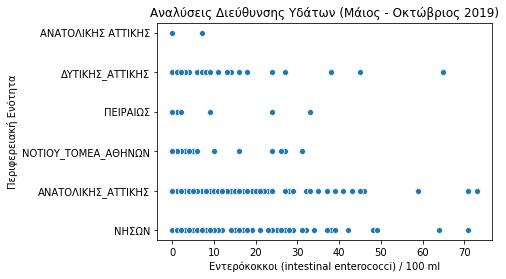

In [128]:
# 2019 insights
# Scatter plot (x-=intestinal enterococci , y=περιφερειακή ενότητα)
ax = sns.scatterplot(x="Intestinal enterococci (cfu/100ml)", y="Περιφερειακή Ενότητα", data=apdattikis2019_df)
plt.title('Αναλύσεις Διεύθυνσης Υδάτων (Μάιος - Οκτώβριος 2019)')
plt.xlabel('Εντερόκοκκοι (intestinal enterococci) / 100 ml')
plt.ylabel('Περιφερειακή Ενότητα') 

Text(0, 0.5, 'Περιφερειακή Ενότητα')

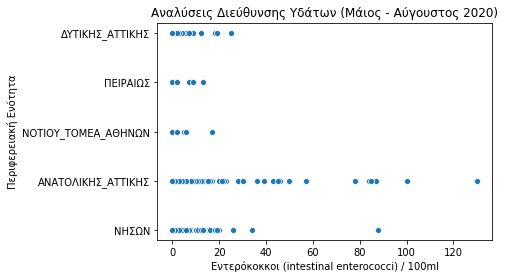

In [129]:
# 2020 insights
# Scatter plot (x-=intestinal enterococci , y=περιφερειακή ενότητα)
ax = sns.scatterplot(x="Intestinal enterococci (cfu/100ml)", y="Περιφερειακή Ενότητα", data=apdattikis2020_df)
plt.title('Αναλύσεις Διεύθυνσης Υδάτων (Μάιος - Αύγουστος 2020)')
plt.xlabel('Εντερόκοκκοι (intestinal enterococci) / 100ml')
plt.ylabel('Περιφερειακή Ενότητα') 

Text(0, 0.5, 'Περιφερειακή Ενότητα')

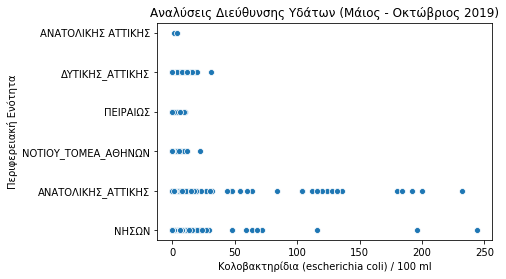

In [130]:
# 2019 insights
# Scatter plot (x-=escherichia coli , y=περιφερειακή ενότητα)
ax = sns.scatterplot(x="Escherichia coli (cfu/100ml)", y="Περιφερειακή Ενότητα", data=apdattikis2019_df)
plt.title('Αναλύσεις Διεύθυνσης Υδάτων (Μάιος - Οκτώβριος 2019)')
plt.xlabel('Κολοβακτηρίδια (escherichia coli) / 100 ml')
plt.ylabel('Περιφερειακή Ενότητα') 

Text(0, 0.5, 'Περιφερειακή Ενότητα')

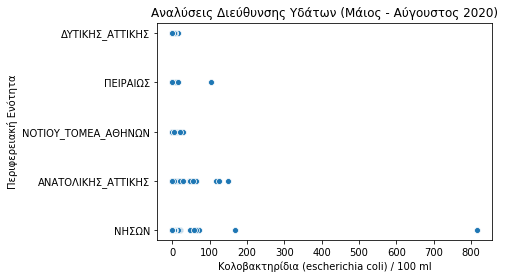

In [131]:
# 2020 insights
# Scatter plot (x-=escherichia coli , y=περιφερειακή ενότητα)
ax = sns.scatterplot(x="Escherichia coli (cfu/100ml)", y="Περιφερειακή Ενότητα", data=apdattikis2020_df)
plt.title('Αναλύσεις Διεύθυνσης Υδάτων (Μάιος - Αύγουστος 2020)')
plt.xlabel('Κολοβακτηρίδια (escherichia coli) / 100 ml')
plt.ylabel('Περιφερειακή Ενότητα') 

Text(0, 0.5, 'Δήμος')

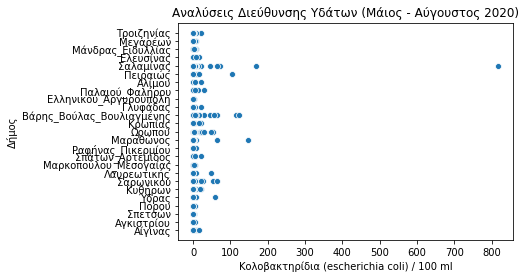

In [132]:
# 2020 insights
# Scatter plot (x-=escherichia coli , y=δήμος)
ax = sns.scatterplot(x="Escherichia coli (cfu/100ml)", y="Δήμος", data=apdattikis2020_df)
plt.title('Αναλύσεις Διεύθυνσης Υδάτων (Μάιος - Αύγουστος 2020)')
plt.xlabel('Κολοβακτηρίδια (escherichia coli) / 100 ml')
plt.ylabel('Δήμος') 

Text(0, 0.5, 'Δήμος')

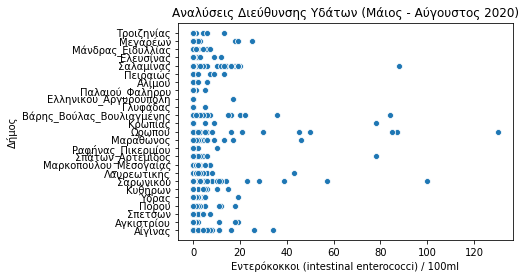

In [ ]:
# 2020 insights
# Scatter plot (x-=intestinal enterococci , y=δήμος)
ax = sns.scatterplot(x="Intestinal enterococci (cfu/100ml)", y="Δήμος", data=apdattikis2020_df)
plt.title('Αναλύσεις Διεύθυνσης Υδάτων (Μάιος - Αύγουστος 2020)')
plt.xlabel('Εντερόκοκκοι (intestinal enterococci) / 100ml')
plt.ylabel('Δήμος') 

Text(0, 0.5, 'Μήνας δειγματοληψίας')

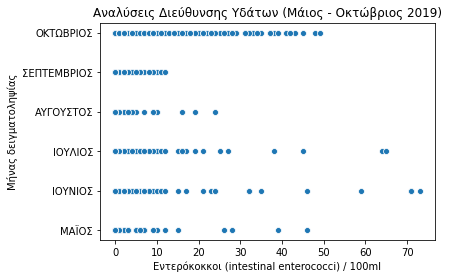

In [ ]:
# 2019 insights
# Scatter plot (x-=publication year, y=brand)
ax = sns.scatterplot(x="Intestinal enterococci (cfu/100ml)", y="Μήνας δειγμ/ας & παράδοσης στο εργ/ριο", data=apdattikis2019_df)
plt.title('Αναλύσεις Διεύθυνσης Υδάτων (Μάιος - Οκτώβριος 2019)')
plt.xlabel('Εντερόκοκκοι (intestinal enterococci) / 100ml')
plt.ylabel('Μήνας δειγματοληψίας')

Text(0, 0.5, 'Μήνας δειγματοληψίας')

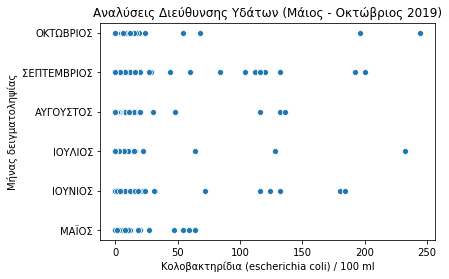

In [ ]:
# 2019 insights
# Scatter plot (x-=publication year, y=brand)
ax = sns.scatterplot(x="Escherichia coli (cfu/100ml)", y="Μήνας δειγμ/ας & παράδοσης στο εργ/ριο", data=apdattikis2019_df)
plt.title('Αναλύσεις Διεύθυνσης Υδάτων (Μάιος - Οκτώβριος 2019)')
plt.xlabel('Κολοβακτηρίδια (escherichia coli) / 100 ml')
plt.ylabel('Μήνας δειγματοληψίας')

Text(0, 0.5, 'Μήνας δειγματοληψίας')

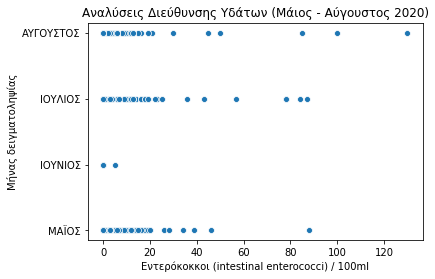

In [ ]:
# 2020 insights
# Scatter plot (x-=publication year, y=brand)
ax = sns.scatterplot(x="Intestinal enterococci (cfu/100ml)", y="Μήνας δειγμ/ας & παράδοσης στο εργ/ριο", data=apdattikis2020_df)
plt.title('Αναλύσεις Διεύθυνσης Υδάτων (Μάιος - Αύγουστος 2020)')
plt.xlabel('Εντερόκοκκοι (intestinal enterococci) / 100ml')
plt.ylabel('Μήνας δειγματοληψίας')

Text(0, 0.5, 'Μήνας δειγματοληψίας')

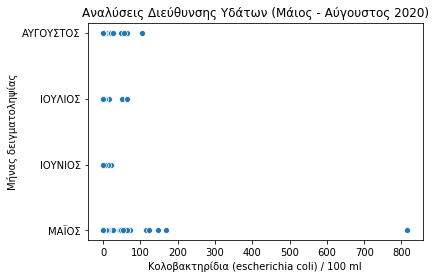

In [ ]:
# 2020 insights
# Scatter plot (x-=publication year, y=brand)
ax = sns.scatterplot(x="Escherichia coli (cfu/100ml)", y="Μήνας δειγμ/ας & παράδοσης στο εργ/ριο", data=apdattikis2020_df)
plt.title('Αναλύσεις Διεύθυνσης Υδάτων (Μάιος - Αύγουστος 2020)')
plt.xlabel('Κολοβακτηρίδια (escherichia coli) / 100 ml')
plt.ylabel('Μήνας δειγματοληψίας')

Text(0, 0.5, 'Βροχόπτωση την ημέρα δειγματοληψίας')

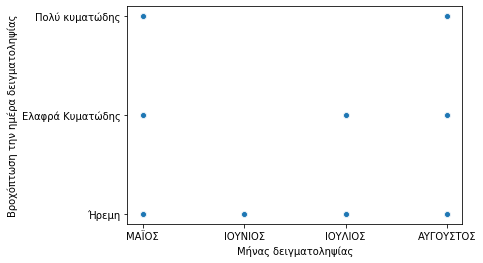

In [ ]:
# 2020 insights
# Scatter plot (x-=publication year, y=brand)
ax = sns.scatterplot(x="Μήνας δειγμ/ας & παράδοσης στο εργ/ριο", y="Κατάσταση Υδάτινης Επιφάνειας", data=apdattikis2020_df)
plt.xlabel('Μήνας δειγματοληψίας')
plt.ylabel('Βροχόπτωση την ημέρα δειγματοληψίας')

Text(0, 0.5, 'Βροχόπτωση την ημέρα δειγματοληψίας')

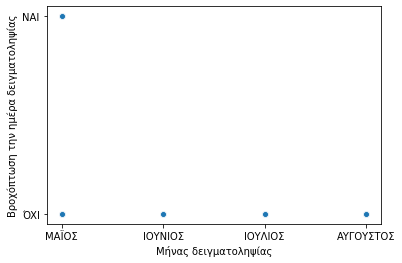

In [ ]:
# 2020 insights
# Scatter plot (x-=publication year, y=brand)
ax = sns.scatterplot(x="Μήνας δειγμ/ας & παράδοσης στο εργ/ριο", y="Βροχόπτωση της ημέρας δειγματοληψίας (N - O)", data=apdattikis2020_df)
plt.xlabel('Μήνας δειγματοληψίας')
plt.ylabel('Βροχόπτωση την ημέρα δειγματοληψίας')